In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

def DTFT(y,M,a,N,W):
    Y = [0 for i in range(N)]
    for i in range(N):
        for k in range(M):
            Y[i] += y[k]*np.exp((-1j)*W[i]*(a+k))
    return Y

def sum_n(X,H,n): #convolution sum for a particular n
    su=0
    for k in range(len(X)):
        if (n-k)>=0 and (n-k)<len(H):
            su=su+X[k]*H[n-k]
    return su

#convolution for the given sequences    
def convolution(X,H):
    Y=[]
    for i in range(len(H)+len(X)-1):
        Y.append(sum_n(X,H,i))
    return Y

def convolution_x(X,H,a_x,a_h):
    x = [i for i in range(a_x+a_h,a_x+a_h+len(X)+len(H)-1)]
    return x

def  convolution_wav(X,H,framerate,nchannels,sampwidth,choice,str_1):
	Y=[]
	for i in range(len(H)+len(X)-1):
		Y.append(sum_n(X,H,i))
    
	for i in range(len(Y)):
		if Y[i]<0:
			Y[i] = 0
		elif Y[i]>255:
			Y[i] = 255
		else:
			Y[i] = round(Y[i])

	Y_arr=np.asarray(Y)	 #list to array
	Y_1=(Y_arr).astype('b') #converting into bytes
	y_n=wave.open(str_1[:-4]+"_conv_with_"+str(choice)+"_seq"+".wav","w")#file of the form: wow_conv_with_1_seq.wav
	y_n.setnchannels(nchannels) #writing the data to a .wav file
	y_n.setsampwidth(sampwidth)
	y_n.setframerate(framerate)
	y_n.writeframes(Y_1.tobytes())
	y_n.close()
	return Y

#For calculating group delay
def grd(H_ph):
    H_grd = [0 for i in range(N)]
    for i in range(1,N-1,1):
        H_grd[i] = (H_ph[i+1]-H_ph[i-1])/(4*np.pi/N)
    
    H_grd[0] = (H_ph[1]-H_ph[0])/(2*np.pi/N)
    H_grd[N-1] = (H_ph[N-1]-H_ph[N-2])/(2*np.pi/N)
    return H_grd

N = 1000
W = np.linspace((-1)*np.pi, np.pi, num=N, endpoint=False)

# Question 1

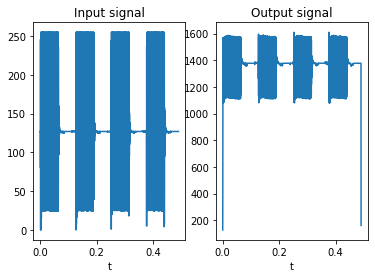

In [2]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [1,2.57877308,3.4975,2.50736971,1.265625]
a_h = 0

#Convolution
y=[]
for i in range(len(h_1)+len(signal)-1):
    y.append(sum_n(signal,h_1,i))

#Plotting
time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()


# Question 2

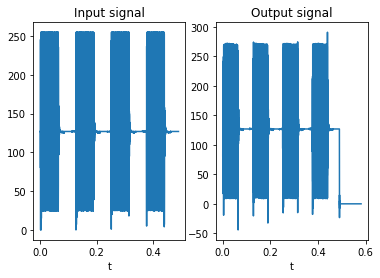

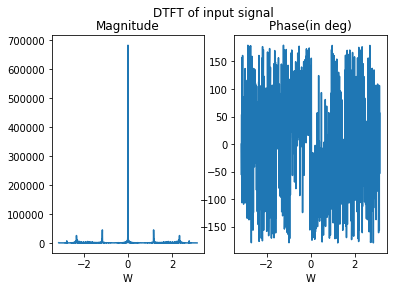

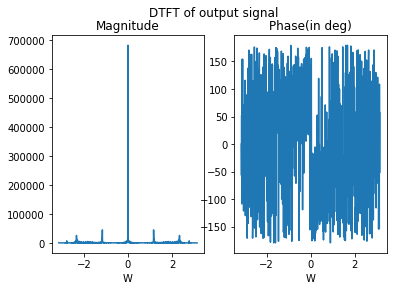

Here, phase values are plotted in degrees
Since, the magnitude and phase spectra of x[n] and x_hat[n] are very similar, we can say that this inverse system is quite effective.


In [23]:
g=[]
for i in range(1000):
    g_i = -1*np.power((- 0.27811529493745262842097076827486 - 0.8559508646656383001882772987301j),i)*(0.14663288710561474694866337150187 + 0.34062336288391083028618212680458j) - np.power((- 0.27811529493745262842097076827486 + 0.8559508646656383001882772987301j), i)*(0.14663288710561474694866337150187 - 0.34062336288391083028618212680458j) + np.power((- 0.64721359549995793880583505597315 - 0.47022820183397862070506789677893j), i)*(0.46663288710561474694866337150187 - 0.083838714358561967363412760930737j) + np.power((- 0.64721359549995793880583505597315 + 0.47022820183397862070506789677893j), i)*(0.46663288710561474694866337150187 + 0.083838714358561967363412760930737j)
    g.append(g_i) 

x_hat=[]
for i in range(len(g)+len(y)-1):
    x_hat.append(sum_n(y,g,i))

time_x_hat = [i/framerate for i in range(len(x_hat))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_x_hat, x_hat)
plt.gca().set_title('Output signal')
plt.show()

#Calculating DTFT
X = DTFT(signal,len(signal),0,N,W)
X_mag = [0 for i in range(N)]
for i in range(N):
    X_mag[i] = np.abs(X[i])
X_ph = [0 for i in range(N)]
for i in range(N):
    X_ph[i] = np.angle(X[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,X_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,X_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.suptitle("DTFT of input signal")
plt.show()

X_hat = DTFT(x_hat,len(x_hat),0,N,W)
X_hat_mag = [0 for i in range(N)]
for i in range(N):
    X_hat_mag[i] = np.abs(X_hat[i])
X_hat_ph = [0 for i in range(N)]
for i in range(N):
    X_hat_ph[i] = np.angle(X_hat[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,X_hat_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,X_hat_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("Here, phase values are plotted in degrees")
print("Since, the magnitude and phase spectra of x[n] and x_hat[n] are very similar, we can say that this inverse system is quite effective.")

# Question 3

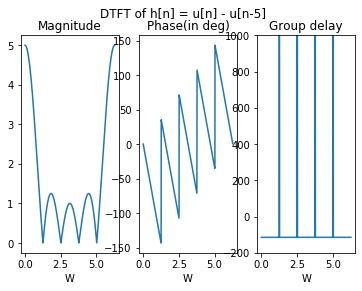

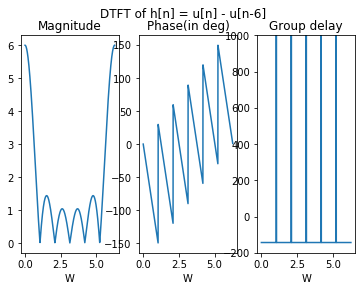

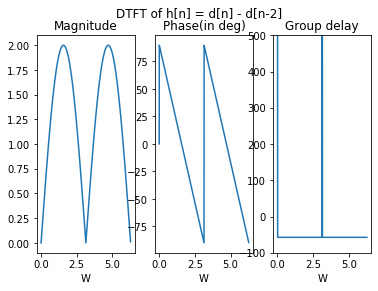

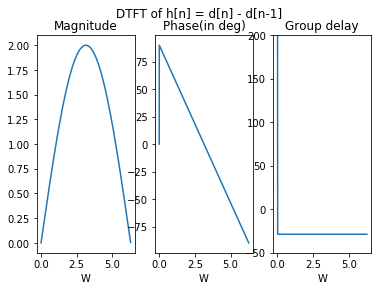

Here, phase values are plotted in degrees


In [22]:
h_a = [1,1,1,1,1]
h_b = [1,1,1,1,1,1]
h_c = [1,0,-1]
h_d = [1,-1]

W_new = np.linspace(0, 2*np.pi, num=N, endpoint=False)

H_a = DTFT(h_a,len(h_a),0,N,W_new)
H_a_mag = [0 for i in range(N)]
for i in range(N):
    H_a_mag[i] = np.abs(H_a[i])
H_a_ph = [0 for i in range(N)]
for i in range(N):
    H_a_ph[i] = np.angle(H_a[i], deg=True)
H_a_grd = grd(H_a_ph)

#Since spikes occur at certain values of W, in order to understand the values of the group delay clearly, I have clipped off some high values on the y-axis in the group delay graph
plt.subplot(1,3,1)
plt.plot(W_new,H_a_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W_new,H_a_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W_new,H_a_grd)
plt.gca().set_ylim([-200,1000])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h[n] = u[n] - u[n-5]")
plt.show()


H_b = DTFT(h_b,len(h_b),0,N,W_new)
H_b_mag = [0 for i in range(N)]
for i in range(N):
    H_b_mag[i] = np.abs(H_b[i])
H_b_ph = [0 for i in range(N)]
for i in range(N):
    H_b_ph[i] = np.angle(H_b[i], deg=True)
H_b_grd = grd(H_b_ph)

plt.subplot(1,3,1)
plt.plot(W_new,H_b_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W_new,H_b_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W_new,H_b_grd)
plt.gca().set_ylim([-200,1000])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h[n] = u[n] - u[n-6]")
plt.show()


H_c = DTFT(h_c,len(h_c),0,N,W_new)
H_c_mag = [0 for i in range(N)]
for i in range(N):
    H_c_mag[i] = np.abs(H_c[i])
H_c_ph = [0 for i in range(N)]
for i in range(N):
    H_c_ph[i] = np.angle(H_c[i], deg=True)
H_c_grd = grd(H_c_ph)

plt.subplot(1,3,1)
plt.plot(W_new,H_c_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W_new,H_c_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W_new,H_c_grd)
plt.gca().set_ylim([-100,500])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h[n] = d[n] - d[n-2]")
plt.show()


H_d = DTFT(h_d,len(h_d),0,N,W_new)
H_d_mag = [0 for i in range(N)]
for i in range(N):
    H_d_mag[i] = np.abs(H_d[i])
H_d_ph = [0 for i in range(N)]
for i in range(N):
    H_d_ph[i] = np.angle(H_d[i], deg=True)
H_d_grd = grd(H_d_ph)

plt.subplot(1,3,1)
plt.plot(W_new,H_d_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,3,2)
plt.plot(W_new,H_d_ph)
plt.gca().set_title('Phase(in deg)')
plt.xlabel("W")
plt.subplot(1,3,3)
plt.plot(W_new,H_d_grd)
plt.gca().set_ylim([-50,200])
plt.gca().set_title('Group delay')
plt.xlabel("W")
plt.suptitle("DTFT of h[n] = d[n] - d[n-1]")
plt.show()

print("Here, phase values are plotted in degrees")